In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Exploratory Data Analysis

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: xlabel='Pregnancies', ylabel='Age'>

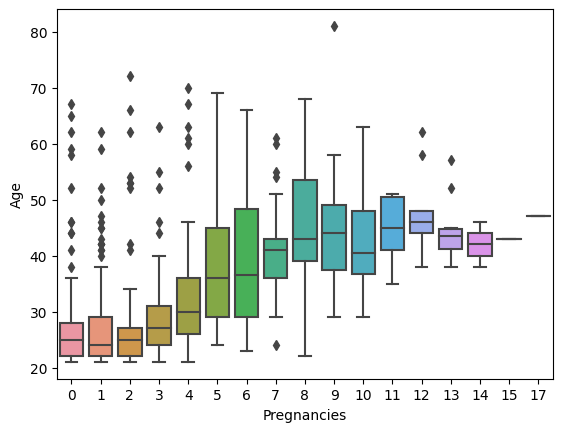

In [64]:
sns.boxplot(x=df["Pregnancies"],
            y=df["Age"])

In [ ]:
## Age 30 to 47 have highest Pregnancies number

<Axes: xlabel='BMI', ylabel='BMI'>

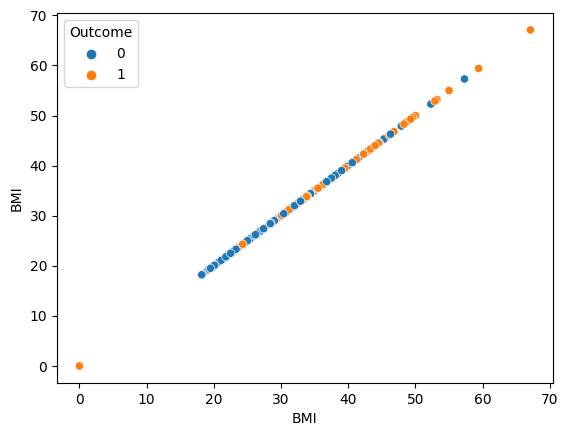

In [55]:
sns.scatterplot(df,
                x="BMI",
                y="BMI",
                hue="Outcome")

In [ ]:
## higher number of Body Mass Index indicates positive class of diabetes diagnosis

<Axes: xlabel='Insulin', ylabel='Insulin'>

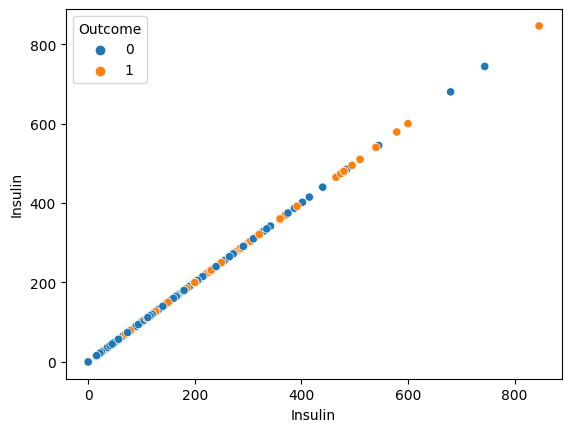

In [72]:
sns.scatterplot(df,
                x="Insulin",
                y="Insulin",
                hue="Outcome")

In [ ]:
## higher number of Insulin indicates positive class of diabetes diagnosis

<Axes: xlabel='Glucose', ylabel='Insulin'>

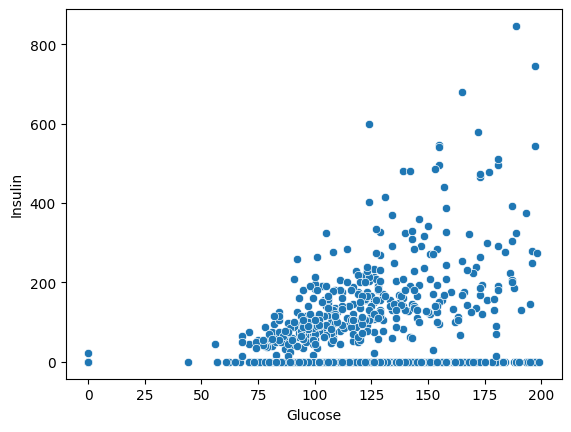

In [77]:
sns.scatterplot(df,
                x="Glucose",
                y="Insulin")

In [78]:
## higher number of Insulin indicates higher number of Glucose

<Axes: xlabel='Glucose', ylabel='Glucose'>

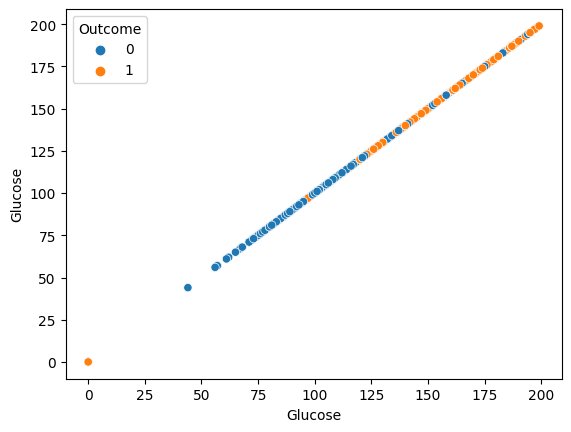

In [73]:
sns.scatterplot(df,
                x="Glucose",
                y="Glucose",
                hue="Outcome")

In [79]:
## higher number of glucose indicates positive class of diabetes 

In [11]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [80]:
# Data Preprocessing

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [12]:
y = df["Outcome"].values
X = df.drop(["Outcome","SkinThickness"],axis=1)
X = X.iloc[:,:-1]

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
X_train.shape

(691, 6)

In [ ]:
## PCA and Scaling

In [17]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
pca=PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [19]:
pca.explained_variance_ratio_.sum()

0.8990420966733639

In [ ]:
# Machine Learning Modeling

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=7)

In [20]:
model_lr=LogisticRegression()

In [21]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred=model_lr.predict(X_test)

In [23]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87        57
           1       0.61      0.95      0.75        20

    accuracy                           0.83        77
   macro avg       0.80      0.87      0.81        77
weighted avg       0.88      0.83      0.84        77



In [24]:
dt = DecisionTreeClassifier(random_state=2023)

In [25]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2023)

In [26]:
y_pred_dt= dt.predict(X_test)

In [27]:
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73        45
           1       0.61      0.59      0.60        32

    accuracy                           0.68        77
   macro avg       0.67      0.66      0.66        77
weighted avg       0.67      0.68      0.67        77



In [28]:
rf = RandomForestClassifier(random_state=2023)

In [29]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=2023)

In [30]:
y_pred_rf=rf.predict(X_test)

In [31]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86        56
           1       0.61      0.90      0.73        21

    accuracy                           0.82        77
   macro avg       0.78      0.85      0.80        77
weighted avg       0.86      0.82      0.83        77



In [32]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=a32976e6a17e210d7234a90e9b771afd822d3c59b252a13f95f1ad0493988436
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [33]:
import eli5
from eli5.sklearn import PermutationImportance

In [34]:
perm = PermutationImportance(rf, random_state = 2023).fit(X_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.2078 ± 0.0716,x0
0.0831 ± 0.0422,x2
0.0468 ± 0.0422,x4
0.0442 ± 0.0265,x3
0.0338 ± 0.0208,x1
